In [1]:
from mocpy import STMOC, MOC
import astropy.units as u
from astropy.time import Time, TimeDelta

In [2]:
# Load 2MASS data
from astropy.table import Table

data = Table.read("./2MASS-list-images.fits.gz", format="fits")

times_start = Time(data["mjd"].data, format="mjd", scale="tdb")
times_end = times_start + TimeDelta(1800, scale="tdb", format="sec")
from astropy.coordinates import SkyCoord

positions = SkyCoord(data["ra"].quantity, data["dec"].quantity)

In [3]:
# Create a cone footprint from the first 10000 observations
num_observations = 10000
%time spatial_coverages = [MOC.from_cone(pos.ra, pos.dec, 5 * u.deg, 7) for pos in positions[:num_observations]]
print("Number of rows in 2MASS: ", len(spatial_coverages))
# Create a STMOC from those 10000 spatial coverages associated with their observational time ranges
%time stmoc = STMOC.from_spatial_coverages(times_start[:num_observations], times_end[:num_observations], spatial_coverages)

CPU times: user 8.13 s, sys: 1.35 s, total: 9.47 s
Wall time: 6.97 s
Number of rows in 2MASS:  10000
CPU times: user 39.4 ms, sys: 1.4 ms, total: 40.8 ms
Wall time: 19.7 ms


In [4]:
moc = stmoc.query_by_time(
    Time([["1998-01-01", "1999-01-01"]], format="iso", scale="tdb")
)

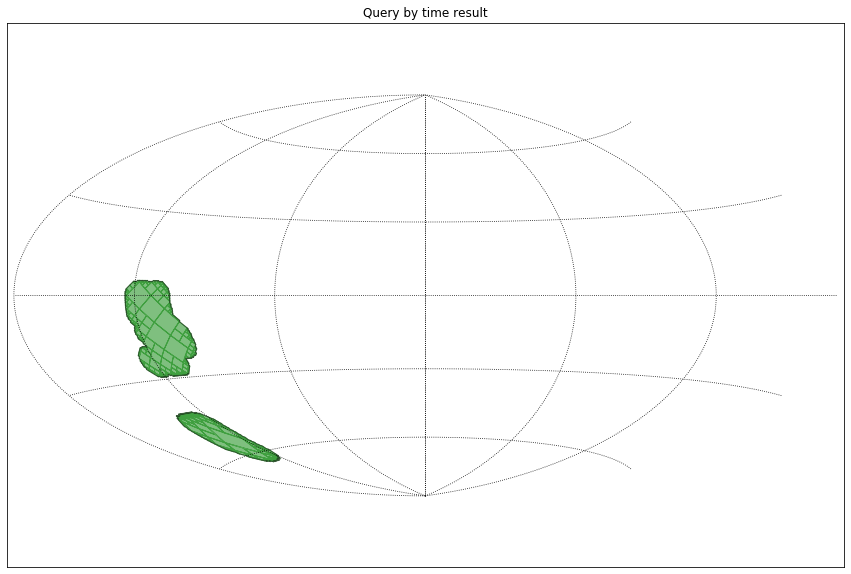

In [5]:
from astropy.coordinates import Angle
import matplotlib.pyplot as plt
from mocpy import World2ScreenMPL

fig = plt.figure(111, figsize=(15, 10))
# Define a astropy WCS easily
with World2ScreenMPL(
    fig,
    fov=330 * u.deg,
    center=SkyCoord(0, 0, unit="deg", frame="icrs"),
    coordsys="icrs",
    rotation=Angle(0, u.degree),
    projection="AIT",
) as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)
    # Call fill with a matplotlib axe and the `~astropy.wcs.WCS` wcs object.
    moc.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
    moc.border(ax=ax, wcs=wcs, alpha=0.5, color="black")
plt.xlabel("ra")
plt.ylabel("dec")
plt.title("Query by time result")
plt.grid(color="black", linestyle="dotted")
plt.show()